<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Algorithm
[강의 노트](https://github.com/ndb796/Python-Data-Analysis-and-Image-Processing-Tutorial/blob/master/16.%20KNN%20Algorithm/Python%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%EA%B3%BC%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EC%B2%98%EB%A6%AC%20-%20KNN%20Algorithm.pdf)

# 예제 1
- opencv

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [49]:
# 각 데이터의 위치: 25 X 2 크기에 각각 0 ~ 100
trainData = np.random.randint(0, 100, (25, 2)).astype(np.float32)

# 각 데이터는 0 or 1
response = np.random.randint(0, 2, (25, 1)).astype(np.float32)

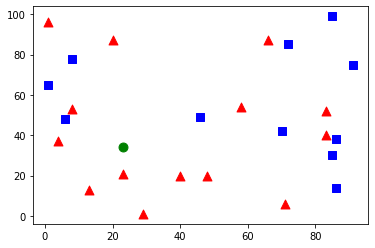

In [50]:
# 값이 0인 데이터를 각각 (x, y) 위치에 빨간색으로 칠합니다.
red = trainData[response.ravel() == 0]
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')

# 값이 1인 데이터를 각각 (x, y) 위치에 파란색으로 칠합니다.
blue = trainData[response.ravel() == 1]
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')

# (0 ~ 100, 0 ~ 100) 위치의 데이터를 하나 생성해 칠합니다.
newcomer = np.random.randint(0, 100, (1, 2)).astype(np.float32)
plt.scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'o')

In [10]:
knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, response)
ret, results, neighbours, dist = knn.findNearest(newcomer, 3) # 녹색원으로부터 일정범위안에  가장가까운 3개의 데이터를 확인

In [11]:
# 가까운 3개를 찾고, 거리를 고려하여 자신을 정합니다.
print("result : ", results) # 녹색원이 0 또는 1에 해당하는지 결과
print("neighbours :", neighbours) # 녹색원 주변 가까운 3개의 데이터
print("distance: ", dist) # 녹색원으로부터 3개 데이터의 각 거리값

plt.show()

result :  [[0.]]
neighbours : [[0. 0. 1.]]
distance:  [[ 293.  538. 1025.]]


# 예제2
- sklearn
- 출처: https://blog.naver.com/baek2sm/221763552440

In [38]:
from sklearn.datasets import load_iris 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV 
import seaborn as sns
import pandas as pd
 
# 분류용 샘플 데이터 불러오기 
iris = load_iris() 
X, y, labels = iris.data, iris.target, iris.target_names 
df = pd.DataFrame(iris.data)
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


데이터 전처리
- 정규화

In [48]:
# 학습/테스트 데이터셋 분할 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) 

# 데이터 전처리(표준화, Standardization) 
# 표준편차화, std값이 거의 1로 변환됨
std = StandardScaler() 
X_train_std = std.fit_transform(X_train) 
X_test_std = std.transform(X_test)

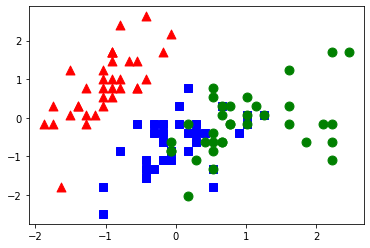

In [47]:
# 그래프
red = X_train_std[y_train.ravel() == 0]
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')
blue = X_train_std[y_train.ravel() == 1]
plt.scatter(blue[:,0], blue[:,1], 80, 'b', 's')
green = X_train_std[y_train.ravel() == 2]
plt.scatter(green[:, 0], green[:,1], 80, 'g', 'o')

모델 학습
- KNN + 그리드서치로 모델 학습
- k값을 임의로 선택하기 보단 GridSearchCV를 통해 최적의 값을 찾아내는것이 좋다 

In [32]:
knn = KNeighborsClassifier() 
param_grid = [{'n_neighbors': range(3, 10)}] 
gs = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1) 
gs.fit(X_train_std, y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': range(3, 10)}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [36]:
# 그리드서치 학습 결과 출력 
print('K값: {0}'.format(gs.best_params_)) 
print('K값이 베스트 하이퍼 파라미터 일 때 정확도: {0:.2f}'.format(gs.best_score_)) 

# 최적화 모델 추출 
model = gs.best_estimator_ 

K값: {'n_neighbors': 8}
K값이 베스트 하이퍼 파라미터 일 때 정확도: 0.96


Test data

In [52]:
score = model.score(X_test_std, y_test) 
print('테스트세트에서의 정확도: {0:.2f}'.format(score)) 
 
# 테스트세트 예측 결과 샘플 출력 
predicted_y = model.predict(X_test_std) 
for i in range(10): 
    print('실제 값: {0}, 예측 값: {1}'.format(labels[y_test[i]], labels[predicted_y[i]])) 

테스트세트에서의 정확도: 0.93
실제 값: virginica, 예측 값: virginica
실제 값: setosa, 예측 값: setosa
실제 값: setosa, 예측 값: setosa
실제 값: virginica, 예측 값: versicolor
실제 값: versicolor, 예측 값: versicolor
실제 값: versicolor, 예측 값: versicolor
실제 값: virginica, 예측 값: virginica
실제 값: versicolor, 예측 값: versicolor
실제 값: virginica, 예측 값: virginica
실제 값: setosa, 예측 값: setosa
